In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
print(os.listdir("/content/gdrive/My Drive/Datasets/plantdisease-tugasakhir/"))

['train', 'test', 'raw.txt', 'test.csv', 'train.csv']


In [0]:
dtrain = pd.read_csv("/content/gdrive/My Drive/Datasets/plantdisease-tugasakhir/train.csv")
dtest = pd.read_csv("/content/gdrive/My Drive/Datasets/plantdisease-tugasakhir/test.csv")

In [6]:
train_count = dtrain.cat.value_counts()
train_sum = sum(train_count)
print(train_count)
print('Data train total: ' + str(train_sum))

Apple___healthy                               1316
Grape___Esca_(Black_Measles)                  1107
Grape___Black_rot                              944
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     861
Potato___Late_blight                           800
Potato___Early_blight                          800
Apple___Apple_scab                             504
Apple___Black_rot                              497
Grape___healthy                                339
Apple___Cedar_apple_rust                       220
Potato___healthy                               122
Name: cat, dtype: int64
Data train total: 7510


In [7]:
test_count = dtest.cat.value_counts()
test_sum = sum(test_count)
print(test_count)
print('Data train total: ' + str(test_sum))

Apple___healthy                               329
Grape___Esca_(Black_Measles)                  276
Grape___Black_rot                             236
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)    215
Potato___Late_blight                          200
Potato___Early_blight                         200
Apple___Apple_scab                            126
Apple___Black_rot                             124
Grape___healthy                                84
Apple___Cedar_apple_rust                       55
Potato___healthy                               30
Name: cat, dtype: int64
Data train total: 1875


In [8]:
print("Percentage of data train: {:.2f}%".format((train_sum / (train_sum + test_sum)*100)))
print("Percentage of data test: {:.2f}%".format((test_sum / (train_sum + test_sum)*100)))

Percentage of data train: 80.02%
Percentage of data test: 19.98%


In [9]:
dtrain.sample(n=10)

,cat,img
3925,Grape___Esca_(Black_Measles),8442f102-0b5b-479f-8a6e-491b2e906d11___FAM_B.M...
1026,Apple___Cedar_apple_rust,32ba7e2f-7ad8-480e-9f37-28469e6802af___FREC_C....
5010,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),258600e9-8638-41b2-9d83-b2cbbecda02c___FAM_L.B...
5284,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),892df5d5-1a74-4abb-8ce7-f8b7739cc627___FAM_L.B...
70,Apple___Apple_scab,352a5659-3552-4e94-8333-c3715d38cc27___FREC_Sc...
5960,Potato___Early_blight,51d521bb-5800-4f46-8fd0-f6cb09f37989___RS_Earl...
4816,Grape___healthy,bc9f03e8-d545-4ba9-a68d-7032b3c36670___Mt.N.V_...
6175,Potato___Early_blight,992a06a6-1aeb-4876-b33e-4267aa1a0c43___RS_Earl...
5771,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),f9a9bb91-8c47-49aa-aa7a-8d56ddd4e2ad___FAM_L.B...
5548,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),caa24bc6-c55d-4730-856f-a397108a7887___FAM_L.B...


In [10]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7510 entries, 0 to 7509
Data columns (total 2 columns):
cat    7510 non-null object
img    7510 non-null object
dtypes: object(2)
memory usage: 117.5+ KB


Populating the interactive namespace from numpy and matplotlib


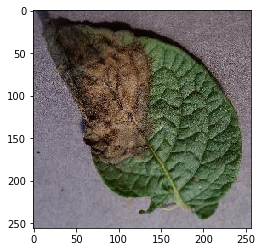

In [11]:
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread('/content/gdrive/My Drive/Datasets/plantdisease-tugasakhir/train/Potato___Late_blight/8e78b212-d2b4-4551-a1c1-70268ec75b0d___RS_LB 2958.JPG')
imgplot = plt.imshow(img)
plt.show()